In [3]:
import numpy as np 
import imutils 
import cv2 as cv

import matplotlib.pyplot as plt

In [4]:
def match_template(image, template, method = "TM_CCOEFF"):

    img = image.copy()
    w, h = template.shape[::-1]

    method = getattr(cv, method)
 
    # Apply template Matching
    res = cv.matchTemplate(img,template,method)

    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc


    bottom_right = (top_left[0] + w, top_left[1] + h)
    
    cv.rectangle(img,top_left, bottom_right, (0,255,0), 2)

    crop_img = img[top_left[1]:bottom_right[1],  top_left[0]:bottom_right[0]]

    plt.subplot(121),plt.imshow(crop_img)##,cmap = 'gray')
    plt.title('QUESTION'), plt.xticks([]), plt.yticks([])
    
    #  plt.subplot(121),plt.imshow(res)##,cmap = 'gray')
    #  plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img)##,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(method)
    
    plt.show()

    return crop_img


    


In [5]:
sheet = cv.imread('Question_Sheet_Scans/sheet1.png', cv.IMREAD_GRAYSCALE)
q_template = cv.imread('Question_Templates/template1.png', cv.IMREAD_GRAYSCALE)
box_a = cv.imread("Answer_Templates/a.png", cv.IMREAD_GRAYSCALE)
box_b = cv.imread("Answer_Templates/b.png", cv.IMREAD_GRAYSCALE)
box_c = cv.imread("Answer_Templates/c.png", cv.IMREAD_GRAYSCALE)
box_d = cv.imread("Answer_Templates/d.png", cv.IMREAD_GRAYSCALE)


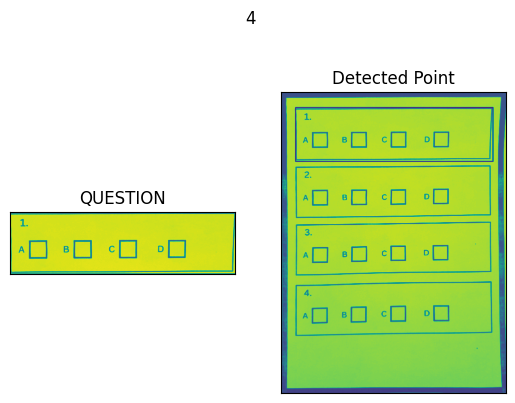

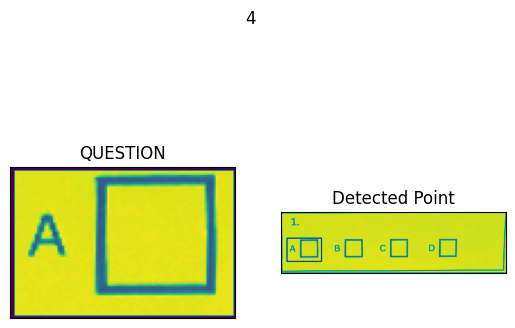

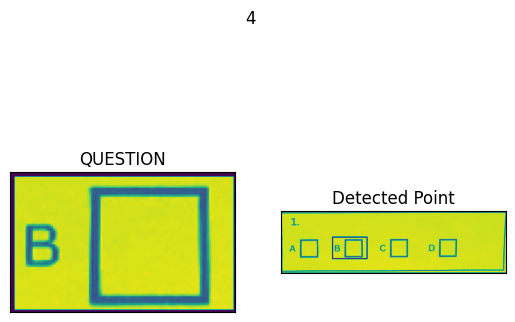

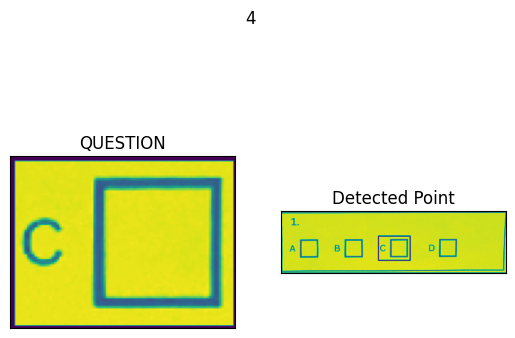

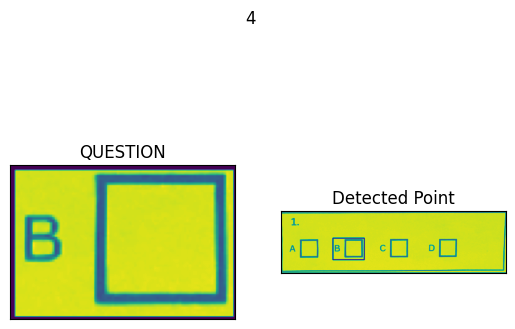

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0, 201, ..., 202, 202,   0],
       ...,
       [  0,   0, 204, ..., 203, 204,   0],
       [  0,   0, 203, ..., 203, 204,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [6]:
question = match_template(sheet, q_template)
match_template(question, box_a)
match_template(question, box_b)
match_template(question, box_c)
match_template(question, box_d)
